In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm

In [3]:
train = pd.read_csv('train.csv')
train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,1.076648,0.182198,3,0,1,0,0,0,0,10,2,1
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,4,1,2,0,1,0,0,0,3,0
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.251940,6,1,2,0,0,0,0,5,3,0
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,4,0,2,0,1,0,0,5,3,0
4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,8,3,0


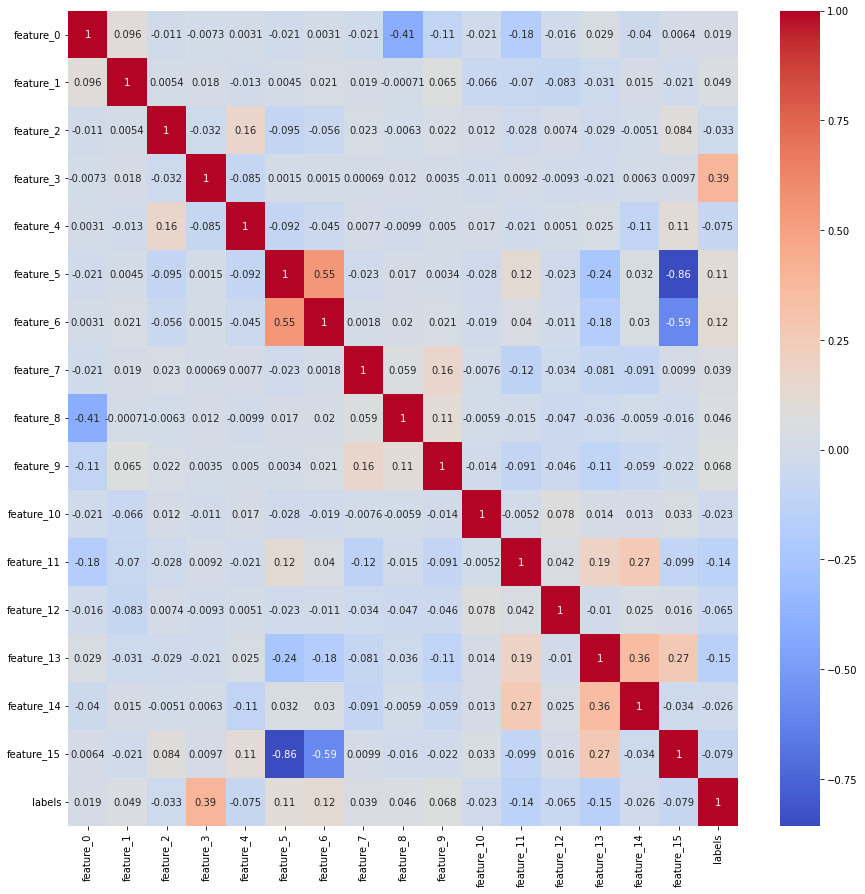

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(), annot=True, cmap = 'coolwarm')
plt.show()

In [12]:
# Import logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

In [14]:
train.columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'labels'],
      dtype='object')

In [36]:
columns = ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15']
X , Y = train[columns], train['labels']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)

In [37]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [38]:
y_pred = model.predict(x_test)

In [76]:
model.intercept_

array([-3.08302843])

In [75]:
model.coef_

array([[ 0.06928515,  0.04638419, -0.06112106,  1.01034067, -0.42288151,
         0.38439559,  0.26421369,  0.00895803,  0.21992128,  0.22445043,
        -0.29310095, -1.01335291, -0.75351337, -0.64579169,  0.04024947,
         0.26886788]])

In [70]:
# Print confusion matrix
from sklearn.metrics import confusion_matrix
# Compute precision and recall
from sklearn.metrics import precision_score, recall_score, f1_score, fbeta_score

In [72]:
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.8, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1]

for thres in thresholds:
    y_pred = model.predict_proba(x_test)
    y_pred = [1 if i[0] > thres else 0 for i in y_pred]
    cm = confusion_matrix(y_test, y_pred)
    accuracy = (cm[0][0] + cm[1][1])/(cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f_score = f1_score(y_test, y_pred)
    f2_score = fbeta_score(y_test, y_pred, beta = 2)
    print(f"For threshold of {thres} the evaluation metrics are {accuracy}, {precision}, {recall}, {f2_score}")


For threshold of 0 the evaluation metrics are 0.11845080114027327, 0.11845080114027327, 1.0, 0.4018541986260255
For threshold of 0.1 the evaluation metrics are 0.11560011795930404, 0.11395164486722156, 0.9543568464730291, 0.3855954935622318
For threshold of 0.2 the evaluation metrics are 0.1122579376781677, 0.10916899720335597, 0.9070539419087137, 0.36846008629989213
For threshold of 0.3 the evaluation metrics are 0.1095055539172319, 0.10405323653962492, 0.8564315352697095, 0.3501153480797937
For threshold of 0.4 the evaluation metrics are 0.1091123562370982, 0.09997963754836083, 0.8149377593360996, 0.33533670263625187
For threshold of 0.8 the evaluation metrics are 0.13142632458468495, 0.05369049011580302, 0.3809128630705394, 0.1716657940010472
For threshold of 0.9 the evaluation metrics are 0.255185294406763, 0.028558745190884877, 0.16016597510373445, 0.08334772845050958
For threshold of 0.91 the evaluation metrics are 0.28418362331662245, 0.026344505066250974, 0.14024896265560166, 0

/opt/homebrew/Caskroom/miniforge/base/envs/env_tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
precision = (tp)/(tp + fp)
recall = (tp)/(tp + fn)

f1_score =  2*(precision*recall)/(precision + recall)



In [63]:

precision()

ImportError: cannot import name 'precision' from 'scipy.optimize' (/opt/homebrew/Caskroom/miniforge/base/envs/env_tf/lib/python3.9/site-packages/scipy/optimize/__init__.py)

In [59]:
threshold = 0.9
y_pred = model.predict_proba(x_test)
y_pred = [1 if i[0] > threshold else 0 for i in y_pred]
cm = confusion_matrix(y_test, y_pred)
accuracy = (cm[0][0] + cm[1][1])/(cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
print(cm)
print(accuracy)

[[2403 6565]
 [1012  193]]
0.255185294406763


In [ ]:
# Print accuracy from confusion matrix
